In [25]:
import pandas as pd
from pyspark.sql import SparkSession
spark= SparkSession.builder.getOrCreate()
# read in the data
infile = 'default.csv'
df = spark.read.csv(infile, inferSchema=True, header = True)

In [3]:
default_no = df.filter(df['default payment next month'] == 0)
default_yes = df.filter(df['default payment next month'] == 1)

In [21]:
ct_no = default_no.groupby('LIMIT_BAL').count()

In [17]:
ct_no.sort('LIMIT_BAL').show()

+---------+-----+
|LIMIT_BAL|count|
+---------+-----+
|    10000|  296|
|    16000|    2|
|    20000| 1278|
|    30000| 1042|
|    40000|  138|
|    50000| 2480|
|    60000|  592|
|    70000|  521|
|    80000| 1204|
|    90000|  485|
|   100000|  776|
|   110000|  456|
|   120000|  547|
|   130000|  572|
|   140000|  579|
|   150000|  923|
|   160000|  557|
|   170000|  454|
|   180000|  819|
|   190000|  180|
+---------+-----+
only showing top 20 rows



In [18]:
ct_yes = default_yes.groupby('LIMIT_BAL').count()

In [46]:
ct_yes.sort('LIMIT_BAL').show()

+---------+-----+
|LIMIT_BAL|count|
+---------+-----+
|    10000|  197|
|    20000|  698|
|    30000|  568|
|    40000|   92|
|    50000|  885|
|    60000|  233|
|    70000|  210|
|    80000|  363|
|    90000|  166|
|   100000|  272|
|   110000|  132|
|   120000|  179|
|   130000|  157|
|   140000|  170|
|   150000|  187|
|   160000|  137|
|   170000|   78|
|   180000|  176|
|   190000|   49|
|   200000|  270|
+---------+-----+
only showing top 20 rows



In [60]:
ct_yes_pd=ct_yes.sort('LIMIT_BAL').toPandas()
ct_yes_pd['LIMIT_BAL']=ct_yes_pd['LIMIT_BAL']/10000
ct_yes_pd['LIMIT_BAL'].round()

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
60    63.0
61    68.0
62    71.0
63    72.0
64    74.0
Name: LIMIT_BAL, Length: 65, dtype: float64

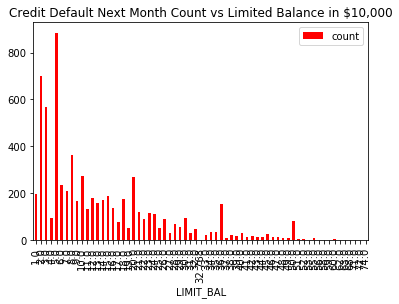

In [58]:
ct_yes_pd.plot.bar(x='LIMIT_BAL',y='count',color='red',title='Credit Default Next Month Count vs Limited Balance in $10,000')

In [61]:
ct_no_pd=ct_no.sort('LIMIT_BAL').toPandas()
ct_no_pd['LIMIT_BAL']=ct_no_pd['LIMIT_BAL']/10000
ct_no_pd['LIMIT_BAL'].round()

0       1.0
1       2.0
2       2.0
3       3.0
4       4.0
      ...  
75     75.0
76     76.0
77     78.0
78     80.0
79    100.0
Name: LIMIT_BAL, Length: 80, dtype: float64

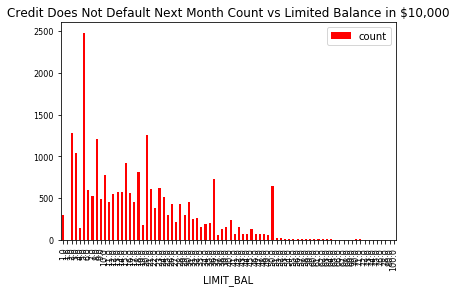

In [80]:
ct_no_pd.plot.bar(x='LIMIT_BAL',y='count',color='red',fontsize=8,title='Credit Does Not Default Next Month Count vs Limited Balance in $10,000')